# Reading the BEDMAP CSV files

Author: Alice Fremand (@almand)

Date: 30/09/2022

## Aim

The goal of this tutorial is to show how the BEDMAP CSV files have been checked geospatially. The code can also be run to create shapefiles or geopackages or directly check the data geospatially. 

## The data

The BEDMAP CSV files are available for downmoad from the UK Polar data Centre:
* BEDMAP1 CSV: https://doi.org/10.5285/f64815ec-4077-4432-9f55-0ce230f46029
* BEDMAP2 CSV: https://doi.org/10.5285/2fd95199-365e-4da1-ae26-3b6d48b3e6ac
* BEDMAP3 CSV: https://doi.org/10.5285/91523ff9-d621-46b3-87f7-ffb6efcd1847

## The code

### Virtual environment

For the code to run, it is important to install the correct dependancies and libraries. In particular the following libraries are crucial for the code to be run: 

* geopandas
* numpy
* Scipy
* math

**Note**: It is recommended to install geopandas first as it will upload most of the needed libraries at the same time without interoperability issues.

### To set up the virtual environment with Conda:
```
>conda create -n geo_env
>conda activate geo_env
>conda config --env --add channels conda-forge
>conda config --env --set channel_priority strict
>conda install python=3 geopandas 
```

### To set up the virtual environment on the SAN: 
`>module load python/conda3`

Then in the folder where you have your code, you need to launch:

`>python3 -m venv geo_env`

It will create a folder with all the environment for python.
To activate the virtual environment you need to lauch it:

```
>source venv/bin/activate.csh
>source activate geo_env
```

You need to make sure that [geo_env] appears before your name on the machine. That means that you are using the virtual environment
Then you need to upgrade pip which is the command that install the packages

`>python3 -m pip install --upgrade pip`

And install the other libraries

`>python3 -m pip install geopandas`

In this tutorial, the virtual environment is already set up. The list of the current libraries loaded is given in the list below.

In [1]:
pip list

Package                       Version
----------------------------- -------------------
alabaster                     0.7.12Note: you may need to restart the kernel to use updated packages.

anyio                         3.3.4
argon2-cffi                   21.1.0
async-generator               1.10
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.10.0
bleach                        4.1.0
brotlipy                      0.7.0
certifi                       2021.10.8
cffi                          1.15.0
cftime                        1.5.1.1
chardet                       4.0.0
charset-normalizer            2.0.0
click                         7.1.2
click-completion              0.5.2
click-log                     0.3.2
click-plugins                 1.1.1
cligj                         0.7.1
cloudpickle                   1.6.0
colorama                      0.4.4
cryptogr

### Upload the modules

* geopandas: used to create geodataframe and easily save the result to shapefiles or geopackages.
* pandas: used to read the csv file
* Other modules: mathplotlib

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Import the csv file

Before starting, the BEDMAP CSV files need to be downloaded from the UK Polar Data Centre Repository. In this example, we use the 'AWI_2014_GEA-IV_AIR_BM3' file located in the following folder: `'D:/BEDMAP/AWI_2015_GEA-DML_AIR_BM3.csv'`

In [3]:
CSV_file = 'D:/BEDMAP/AWI_2015_GEA-DML_AIR_BM3.csv'

The `pandas` module is used to open the file. The command `pd.read_csv(input_file)` can be used to read the BEDMAP CSV file. To skip the metadata at the top of the file, we use the `skiprows` argument as follows:

In [4]:
data = pd.read_csv(CSV_file, skiprows=18, low_memory=False)

By using the `read_csv()` command, the data is directly saved in a dataframe. We can have a look at the top lines by running the following:

In [5]:
data.head()

,trajectory_id,trace_number,longitude (degree_east),latitude (degree_north),date,time_UTC,surface_altitude (m),land_ice_thickness (m),bedrock_altitude (m),two_way_travel_time (m),aircraft_altitude (m),along_track_distance (m)
0,20162002_01,-9999,-5.7951,-71.0262,2015-12-15,12:43:36,-9999,463.7,-9999,0.000006,-9999,0
1,20162002_01,-9999,-5.7937,-71.0264,2015-12-15,12:43:37,-9999,463.7,-9999,0.000006,-9999,56
2,20162002_01,-9999,-5.7871,-71.0275,2015-12-15,12:43:42,-9999,456.3,-9999,0.000005,-9999,325
3,20162002_01,-9999,-5.7824,-71.0282,2015-12-15,12:43:45,-9999,452.6,-9999,0.000005,-9999,512
4,20162002_01,-9999,-5.7729,-71.0296,2015-12-15,12:43:51,-9999,445.3,-9999,0.000005,-9999,891


In [6]:
data.dtypes

trajectory_id                object
trace_number                  int64
longitude (degree_east)     float64
latitude (degree_north)     float64
date                         object
time_UTC                     object
surface_altitude (m)          int64
land_ice_thickness (m)      float64
bedrock_altitude (m)          int64
two_way_travel_time (m)     float64
aircraft_altitude (m)         int64
along_track_distance (m)      int64
dtype: object

In [7]:
data.tail()

,trajectory_id,trace_number,longitude (degree_east),latitude (degree_north),date,time_UTC,surface_altitude (m),land_ice_thickness (m),bedrock_altitude (m),two_way_travel_time (m),aircraft_altitude (m),along_track_distance (m)
23377,20162020_04,-9999,-7.3021,-70.6626,2016-01-03,14:51:27,-9999,251.8,-9999,0.000003,-9999,161042
23378,20162020_04,-9999,-7.3057,-70.6625,2016-01-03,14:51:28,-9999,252.4,-9999,0.000003,-9999,161176
23379,20162020_04,-9999,-7.3119,-70.6624,2016-01-03,14:51:32,-9999,251.6,-9999,0.000003,-9999,161406
23380,20162020_04,-9999,-7.3181,-70.6623,2016-01-03,14:51:35,-9999,252.5,-9999,0.000003,-9999,161636
23381,20162020_04,-9999,-7.3234,-70.6622,2016-01-03,14:51:38,-9999,253.0,-9999,0.000003,-9999,161832


## Convert the file geospatially

The `geopandas` module is then used to convert the data to a geodataframe. It will convert the latitude/longitude to points.
To do that, you will need to identify the specific header used for longitude and latitude in the CSV file.

Here, it is `Longitude_decimal_degrees` and `Latitude_decimal_degrees`

In [8]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude (degree_east)'], data['latitude (degree_north)']))

We can check that the conversion has been done:

In [9]:
gdf.head()

,trajectory_id,trace_number,longitude (degree_east),latitude (degree_north),date,time_UTC,surface_altitude (m),land_ice_thickness (m),bedrock_altitude (m),two_way_travel_time (m),aircraft_altitude (m),along_track_distance (m),geometry
0,20162002_01,-9999,-5.7951,-71.0262,2015-12-15,12:43:36,-9999,463.7,-9999,0.000006,-9999,0,POINT (-5.79510 -71.02620)
1,20162002_01,-9999,-5.7937,-71.0264,2015-12-15,12:43:37,-9999,463.7,-9999,0.000006,-9999,56,POINT (-5.79370 -71.02640)
2,20162002_01,-9999,-5.7871,-71.0275,2015-12-15,12:43:42,-9999,456.3,-9999,0.000005,-9999,325,POINT (-5.78710 -71.02750)
3,20162002_01,-9999,-5.7824,-71.0282,2015-12-15,12:43:45,-9999,452.6,-9999,0.000005,-9999,512,POINT (-5.78240 -71.02820)
4,20162002_01,-9999,-5.7729,-71.0296,2015-12-15,12:43:51,-9999,445.3,-9999,0.000005,-9999,891,POINT (-5.77290 -71.02960)


## Determine the variables to show in the shapefile/geopackage

All the variables that are present in the dataframe will be shown in the final shapefile or geopackage. We might want to remove the columns that we don't want. For instance, here all the line_ID values are equal to -9999, so this information is missing. To delete this column, we just need to do the following:

In [10]:
gdf = gdf.drop(columns=['trajectory_id'])
gdf.head()

,trace_number,longitude (degree_east),latitude (degree_north),date,time_UTC,surface_altitude (m),land_ice_thickness (m),bedrock_altitude (m),two_way_travel_time (m),aircraft_altitude (m),along_track_distance (m),geometry
0,-9999,-5.7951,-71.0262,2015-12-15,12:43:36,-9999,463.7,-9999,0.000006,-9999,0,POINT (-5.79510 -71.02620)
1,-9999,-5.7937,-71.0264,2015-12-15,12:43:37,-9999,463.7,-9999,0.000006,-9999,56,POINT (-5.79370 -71.02640)
2,-9999,-5.7871,-71.0275,2015-12-15,12:43:42,-9999,456.3,-9999,0.000005,-9999,325,POINT (-5.78710 -71.02750)
3,-9999,-5.7824,-71.0282,2015-12-15,12:43:45,-9999,452.6,-9999,0.000005,-9999,512,POINT (-5.78240 -71.02820)
4,-9999,-5.7729,-71.0296,2015-12-15,12:43:51,-9999,445.3,-9999,0.000005,-9999,891,POINT (-5.77290 -71.02960)


As you can see, the column Line_ID has been removed. We can also remove several variables at the same time:

In [11]:
gdf = gdf.drop(columns=[ 'trace_number', 'date', 'time_UTC'])
gdf.head()

,longitude (degree_east),latitude (degree_north),surface_altitude (m),land_ice_thickness (m),bedrock_altitude (m),two_way_travel_time (m),aircraft_altitude (m),along_track_distance (m),geometry
0,-5.7951,-71.0262,-9999,463.7,-9999,0.000006,-9999,0,POINT (-5.79510 -71.02620)
1,-5.7937,-71.0264,-9999,463.7,-9999,0.000006,-9999,56,POINT (-5.79370 -71.02640)
2,-5.7871,-71.0275,-9999,456.3,-9999,0.000005,-9999,325,POINT (-5.78710 -71.02750)
3,-5.7824,-71.0282,-9999,452.6,-9999,0.000005,-9999,512,POINT (-5.78240 -71.02820)
4,-5.7729,-71.0296,-9999,445.3,-9999,0.000005,-9999,891,POINT (-5.77290 -71.02960)


## Setting up the coordinate system

It is important to then set the coordinate system. 
Here the WGS84 coordinate system is used, it corresponds to the EPSG: 4326. 

In [12]:
gdf = gdf.set_crs("EPSG:4326")

With geopandas, it is also possible to convert the data to another coordinate system and project it. You just need to know the EPSG ID of the output coordinate system. Here is how to convert the data to the stereographic geographic system.

In [13]:
gdf =  gdf.to_crs("EPSG:3031")

## Plotting the data


<AxesSubplot:>

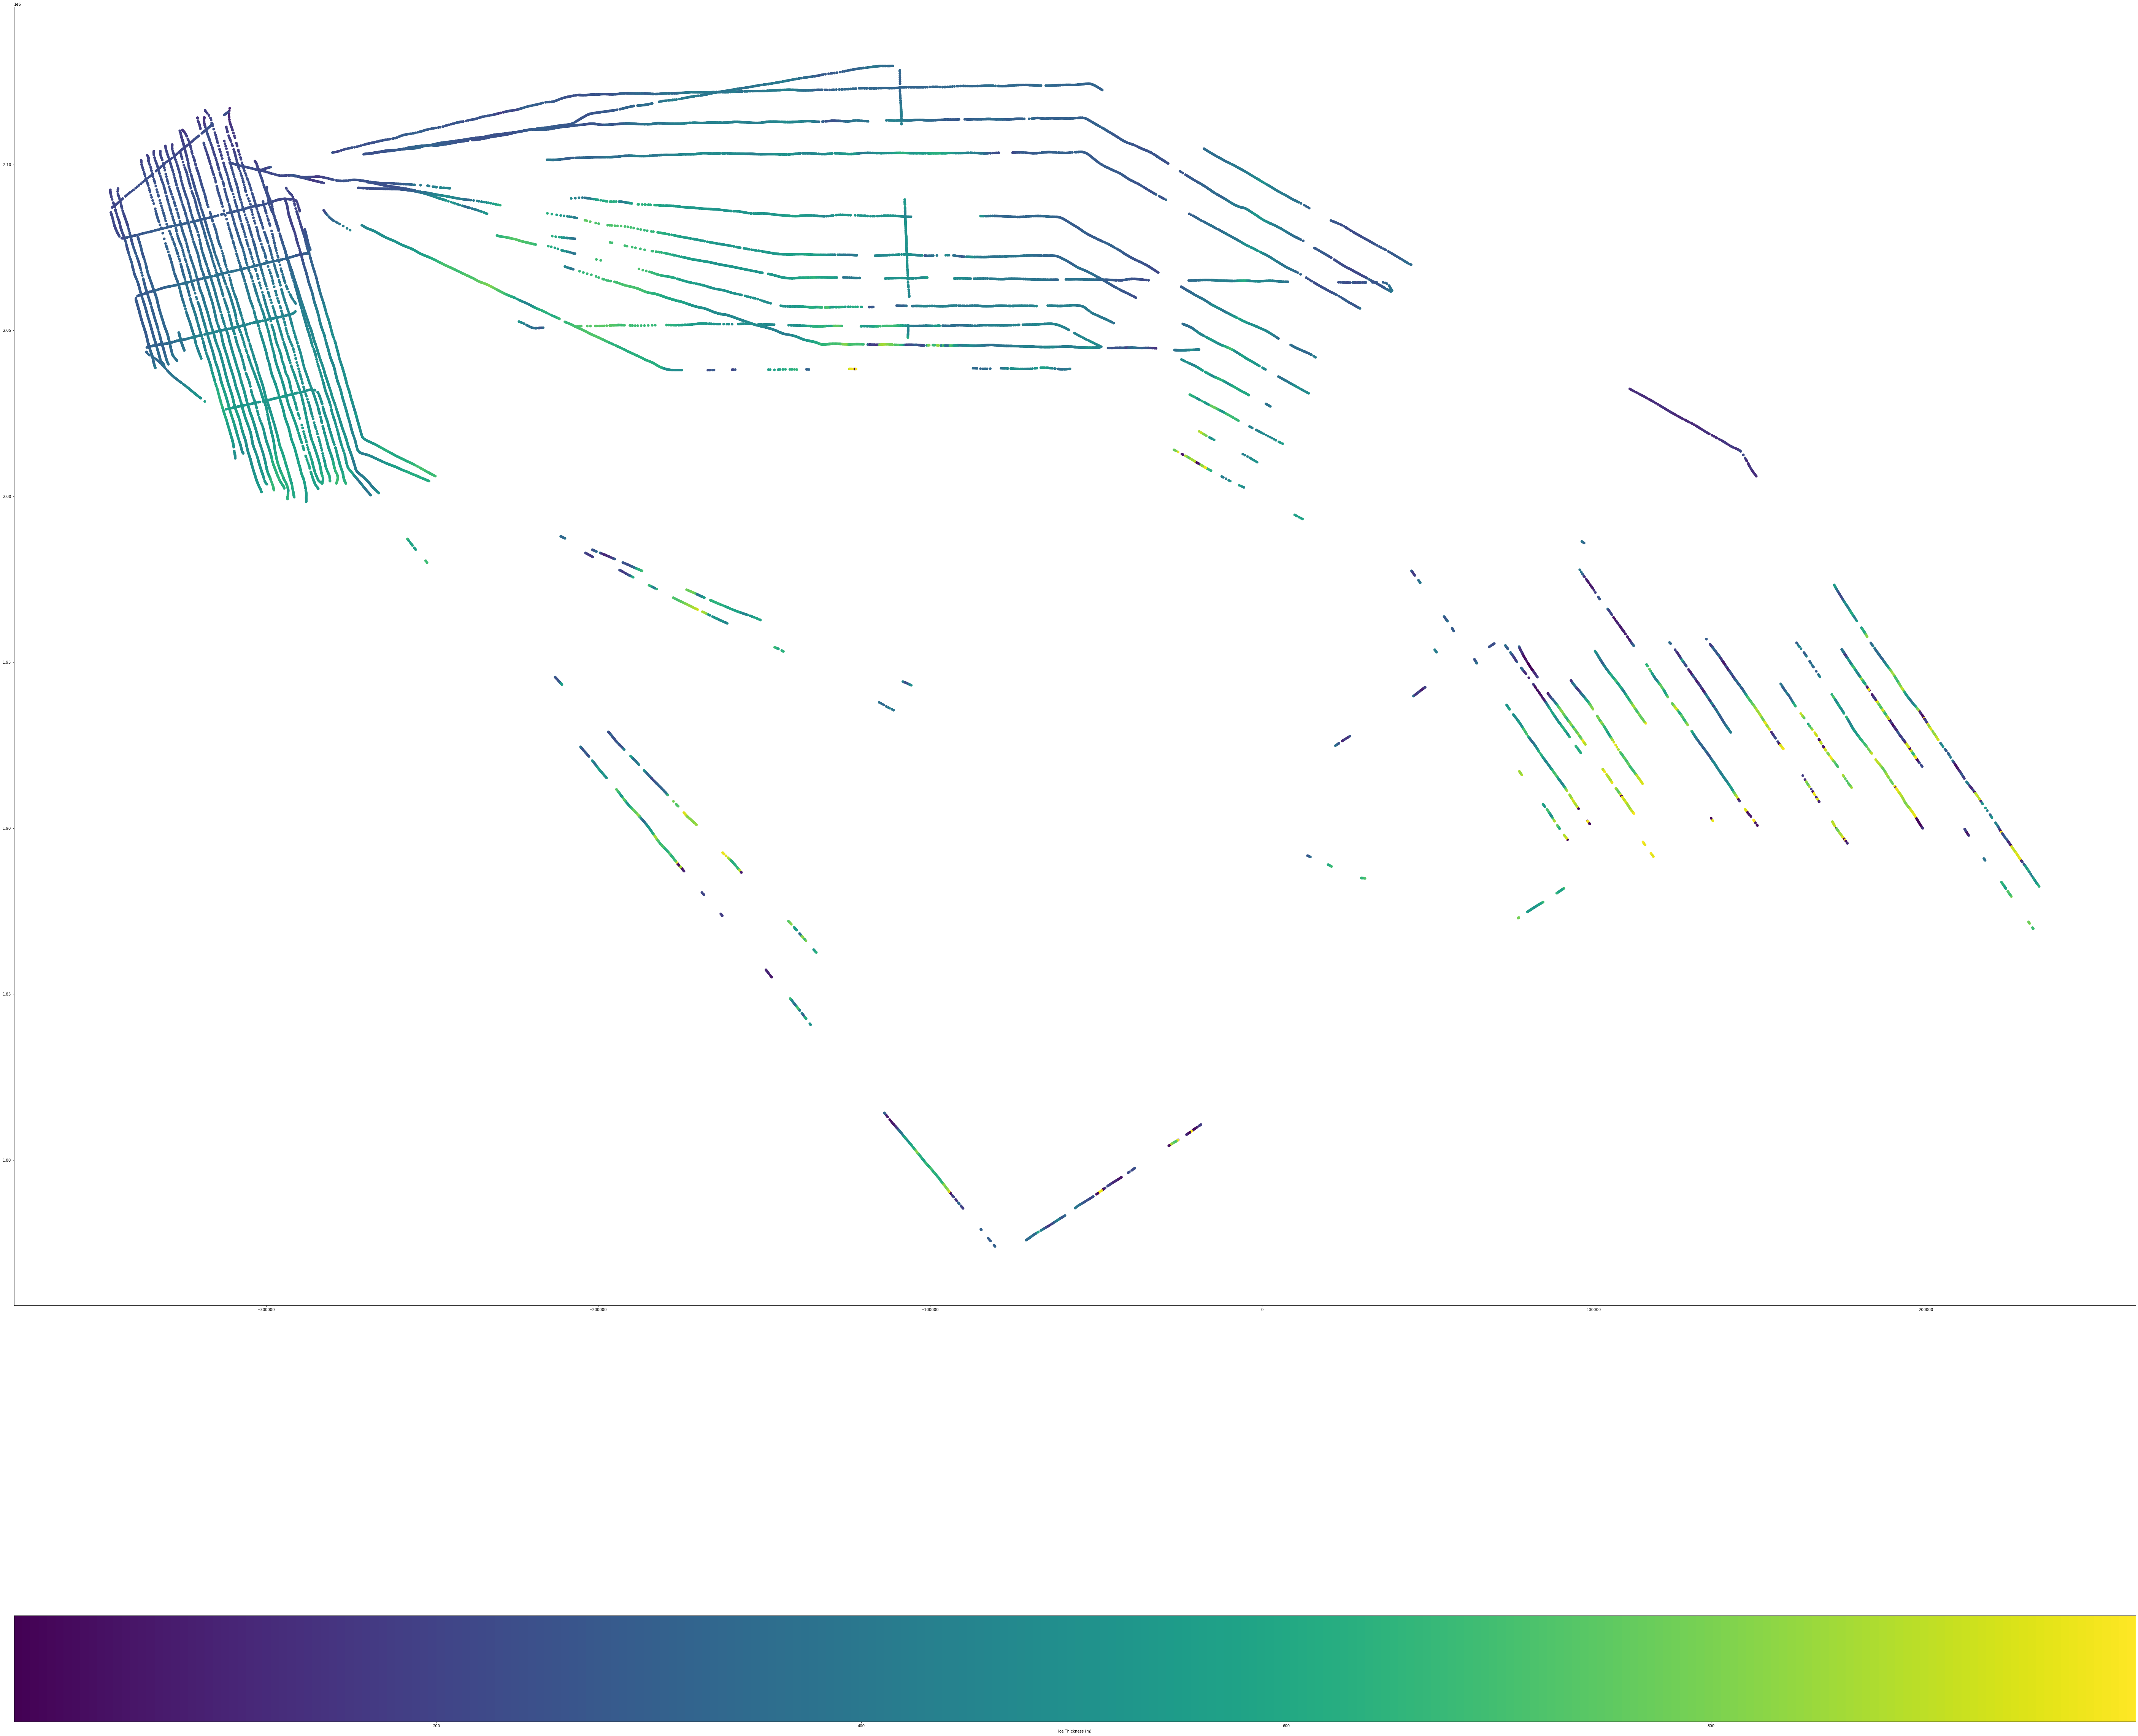

<Figure size 10000x10000 with 0 Axes>

In [14]:
plt.rcParams["figure.figsize"] = (100,100)
fig, ax = plt.subplots(1, 1)
fig=plt.figure(figsize=(100,100), dpi= 100, facecolor='w', edgecolor='k')
gdf.plot(column='land_ice_thickness (m)', ax=ax, legend=True, legend_kwds={'label': "Ice Thickness (m)",'orientation': "horizontal"})

## Saving the data to geopackages or shapefile

To save the data to geopackage or shapefile, we only need to use the `.to_file()` command from `geopandas` module. Then we specify the driver, that will specify the type of output - geopackage or shapefile.

In [15]:
gdf.to_file('D:/BEDMAP/point.gpkg', layer='Points', driver="GPKG")
gdf.to_file('D:/BEDMAP/point.shp', driver="ESRI Shapefile")


<ipython-input-15-42d2f7788648>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('D:/BEDMAP/point.shp', driver="ESRI Shapefile")
